<a href="https://colab.research.google.com/github/Geoffrey256/mental_health_rag/blob/main/mental_health_rag_with_openai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
def load_data(corpus_path):
    with open(corpus_path, 'r', encoding='utf-8') as file:
        return file.readlines()

corpus_path = '/content/drive/MyDrive/dataset/book_corpus.txt'
corpus = load_data(corpus_path)
print("Data loaded successfully!")
for line in corpus[:10]:
    print(line)

Data loaded successfully!


Introduction

The creation of the fifth edition of Diagnostic and Statistical Manual of Mental Disorders

(DSM-5) was a massive undertaking that involved hundreds of people working toward a

common goal over a 12-year process. Much thought and deliberation were involved in

evaluating the diagnostic criteria, considering the organization of every aspect of the manual, and creating new features believed to be most useful to clinicians. All of these efforts

were directed toward the goal of enhancing the clinical usefulness of DSM-5 as a guide in

the diagnosis of mental disorders.

Reliable diagnoses are essential for guiding treatment recommendations, identifying

prevalence rates for mental health service planning, identifying patient groups for clinical



In [4]:
# @title Installing relevant libraries
!pip install nltk
!pip install nltk textblob
!pip install spacy
!python -m spacy download en_core_web_sm

import nltk
nltk.download('stopwords')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 34.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Most common 20 stop words:
the: 17122
of: 15903
and: 11931
or: 10429
in: 9266
to: 8244
a: 7453
with: 6503
is: 6152
for: 4525
be: 3925
are: 3880
that: 3113
as: 2676
other: 2676
not: 2596
by: 2290
an: 1632
from: 1516
have: 1378


<ipython-input-5-b39934cd533b>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


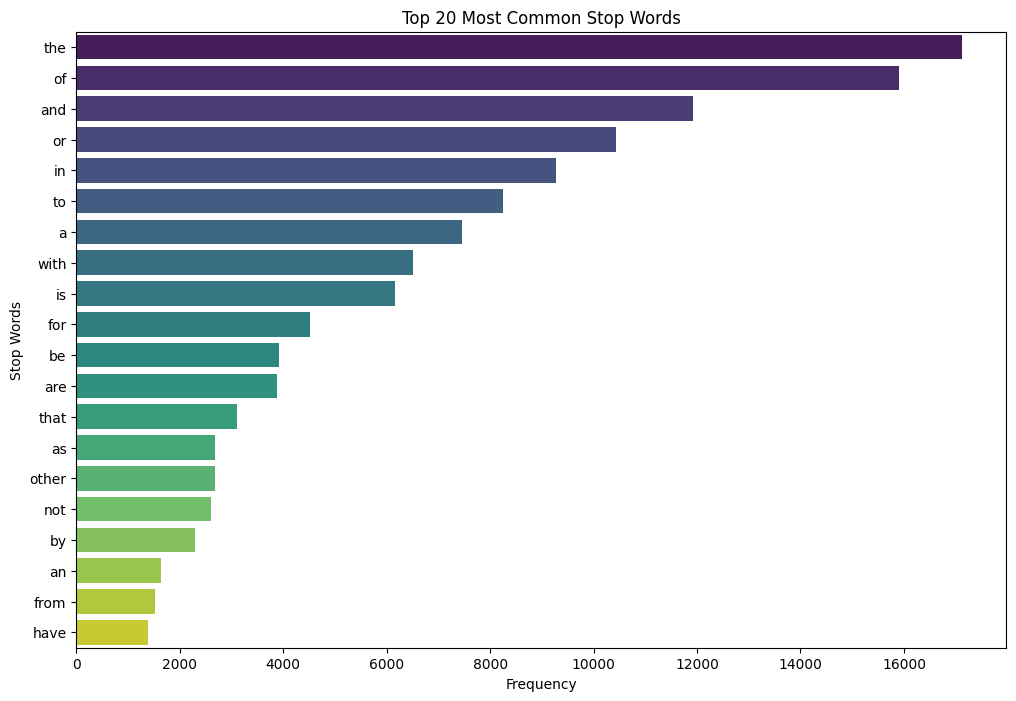

In [5]:
# @title Visualizing stop words
# Import libraries
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the corpus to lowercase and combine all lines into a single string
all_text = ' '.join(line.lower() for line in corpus)
words = all_text.split()                                         # Split the text into words
stop_words = set(stopwords.words('english'))                     # Load NLTK's stop words
filtered_words = [word for word in words if word in stop_words]  # Filter out the stop words
word_counts = Counter(filtered_words)                            # Count the frequency of each stop word
common_stop_words = word_counts.most_common(20)                  # Get the 20 most common stop words

# Print the most common 20 stop words
print("Most common 20 stop words:")
for word, count in common_stop_words:
    print(f"{word}: {count}")

# Plots for the stop words
words, counts = zip(*common_stop_words)
plt.figure(figsize=(12, 8))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title('Top 20 Most Common Stop Words')
plt.xlabel('Frequency')
plt.ylabel('Stop Words')
plt.show()


In [6]:
# @title Data Cleaning
import re
from nltk.tokenize import word_tokenize
nltk.download('punkt')


def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

cleaned_corpus = [clean_text(doc) for doc in corpus]
for line in cleaned_corpus[:5]:
  print(line)  # Print first 5 cleaned lines to check


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


 
introduction 
the creation of the fifth edition of diagnostic and statistical manual of mental disorders 
 dsm 5  was a massive undertaking that involved hundreds of people working toward a 
common goal over a 12 year process  much thought and deliberation were involved in 


In [7]:
# @title Removing stopwords
def remove_stopwords(text):
    words = nltk.word_tokenize(text)
    # return ' '.join([word for word in words if word not in stop_words])
    return ' '.join([word for word in words if (word not in stop_words) and len(word) > 1])

corpus_no_stopwords = [remove_stopwords(doc) for doc in cleaned_corpus]
for line in corpus_no_stopwords[:5]:
  print(line)  # Print first 5 cleaned lines to compare the changes with the previous version



introduction
creation fifth edition diagnostic statistical manual mental disorders
dsm massive undertaking involved hundreds people working toward
common goal 12 year process much thought deliberation involved


In [8]:
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns


# Remove stop words from each document in the corpus
corpus_no_stopwords = [remove_stopwords(doc) for doc in cleaned_corpus]

# Combine all cleaned documents into a single string
all_text_no_stopwords = ' '.join(corpus_no_stopwords)

# Split the text into words (non-stop words)
words_no_stopwords = all_text_no_stopwords.split()

# Count the frequency of each word
word_counts_no_stopwords = Counter(words_no_stopwords)

# Get the 20 most common non-stop words
common_words = word_counts_no_stopwords.most_common(20)

# Print the most common 20 non-stop words
print("Most common 20 non-stop words:")
for word, count in common_words:
  print(f"{word}: {count}")



Most common 20 non-stop words:
disorder: 10411
may: 3718
disorders: 2943
use: 2859
symptoms: 2661
individuals: 2238
substance: 1981
related: 1575
sleep: 1569
diagnosis: 1518
medical: 1392
anxiety: 1377
personality: 1292
individual: 1281
criteria: 1235
depressive: 1207
induced: 1177
associated: 1170
social: 1139
diagnostic: 1105


<ipython-input-9-af073bb25884>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='ocean')


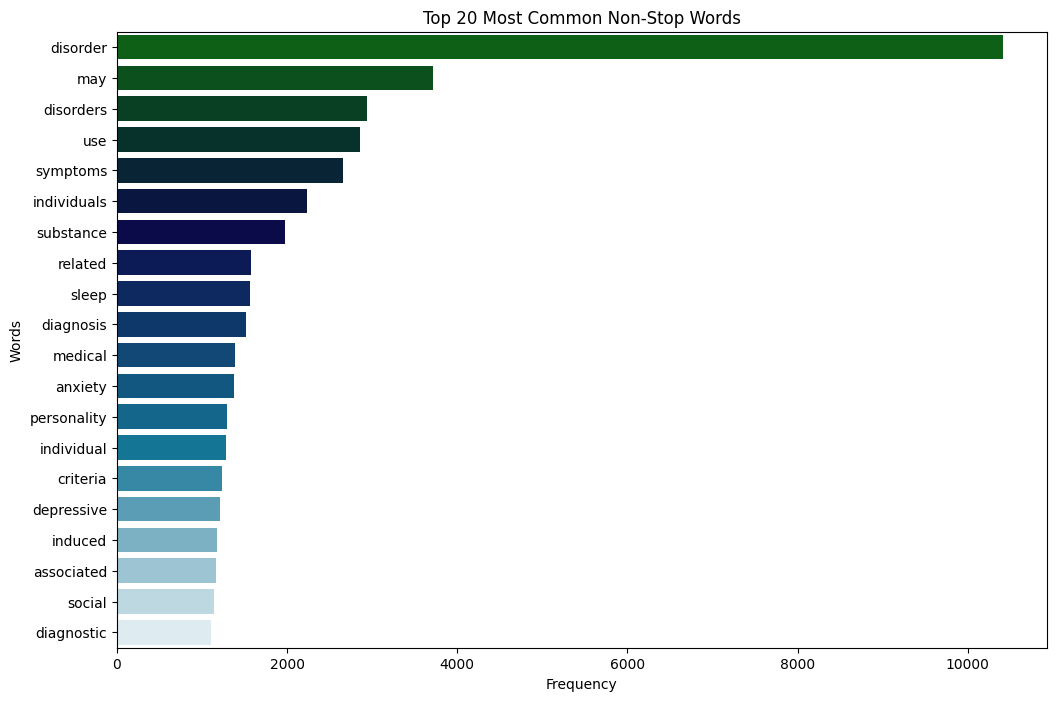

In [9]:
#@title Create a bar chart for the non-stop words
words, counts = zip(*common_words)
plt.figure(figsize=(12, 8))
sns.barplot(x=list(counts), y=list(words), palette='ocean')
plt.title('Top 20 Most Common Non-Stop Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


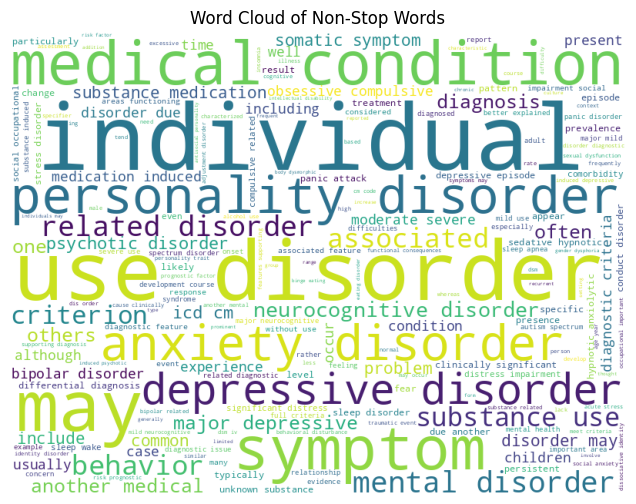

In [10]:
from wordcloud import WordCloud

#@title Create a WordCloud object (adjust parameters as desired)
wordcloud = WordCloud(width=800, height=600, background_color='white').generate(all_text_no_stopwords)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of Non-Stop Words')
plt.show()

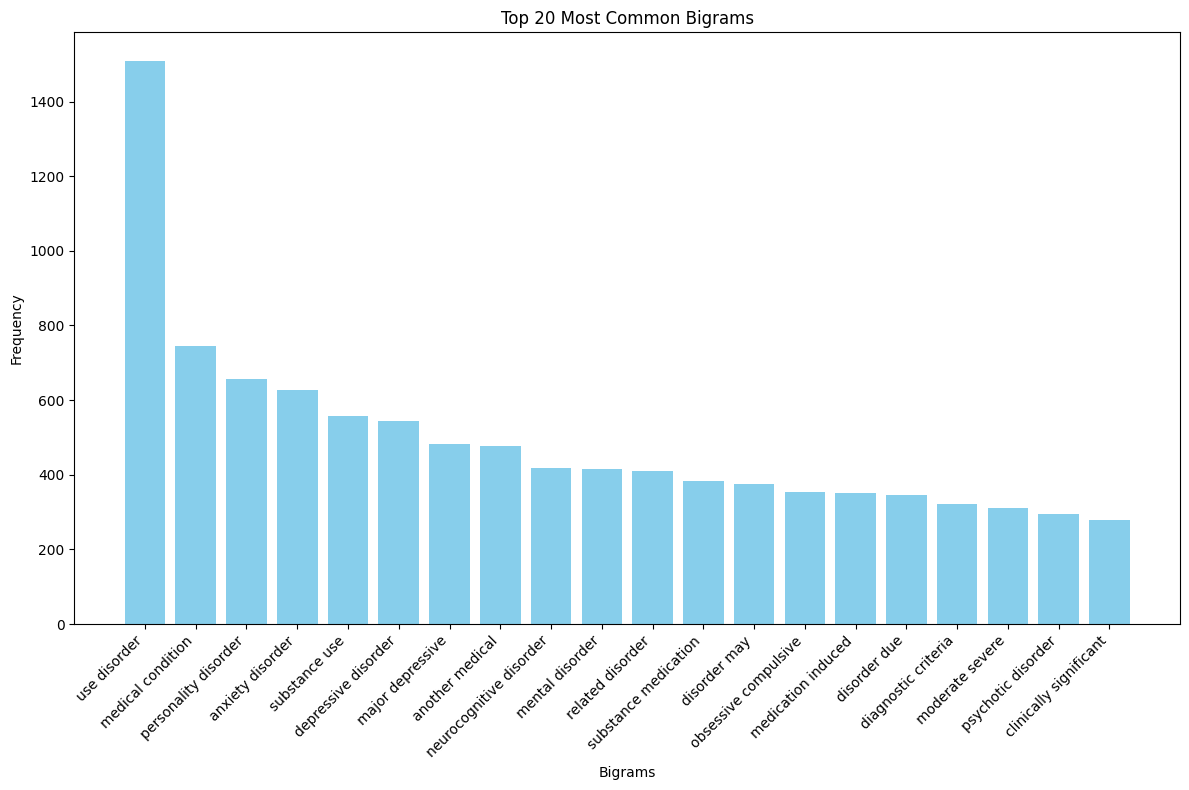

In [11]:
#@title --Bigrams--
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt

# Generate bigrams (2-grams) from the cleaned corpus
bigrams = ngrams(all_text_no_stopwords.split(), 2)  # Create bigrams from individual words

# Count bigram frequencies
bigram_counts = Counter(bigrams)

# Get the 20 most common bigrams
common_bigrams = bigram_counts.most_common(20)

# Bigram Bar Chart
bigram_words, bigram_counts = zip(*common_bigrams)

# Format bigrams for x-axis labels
bigram_labels = [" ".join(bigram) for bigram in bigram_words]

plt.figure(figsize=(12, 8))
plt.bar(bigram_labels, bigram_counts, color='skyblue')
plt.title('Top 20 Most Common Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

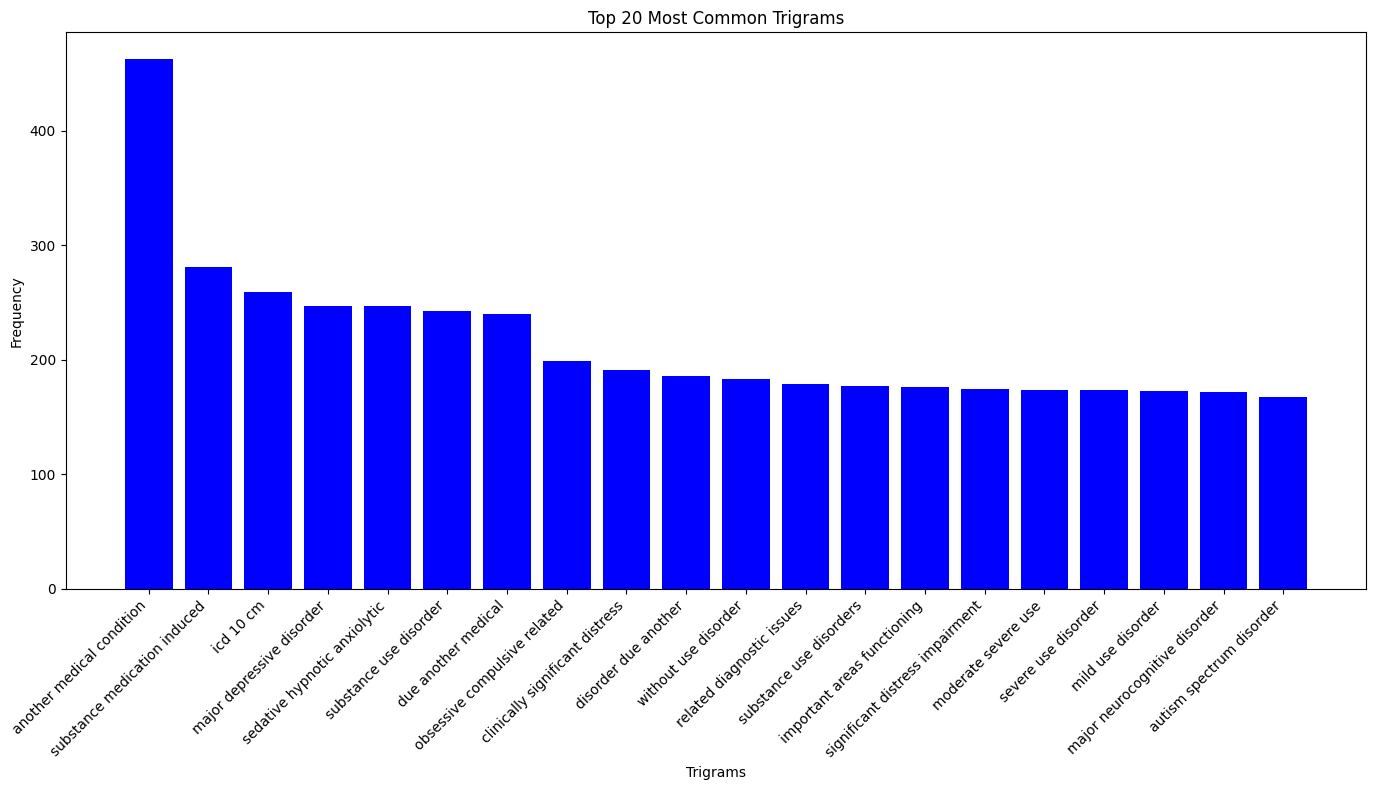

In [12]:
# @title --- Trigrams ---
trigrams = ngrams(all_text_no_stopwords.split(), 3)  # Generate trigrams
trigram_counts = Counter(trigrams)
common_trigrams = trigram_counts.most_common(20)

# --- Trigram Bar Chart ---
trigram_words, trigram_counts = zip(*common_trigrams)
trigram_labels = [" ".join(trigram) for trigram in trigram_words]

plt.figure(figsize=(14, 8))  # Adjust figure size as needed
plt.bar(trigram_labels, trigram_counts, color='blue')
plt.title('Top 20 Most Common Trigrams')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

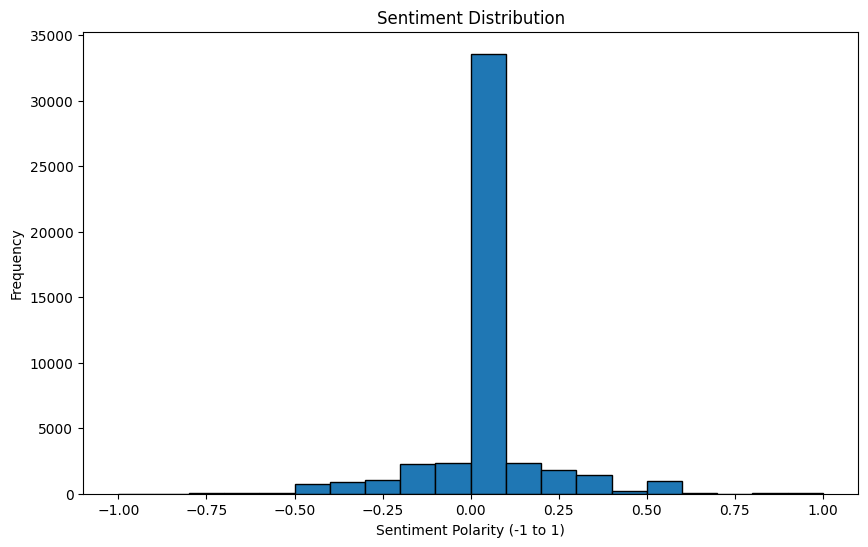

Average Sentiment: 0.019580463466835438


In [13]:
#@title Word sentiments
from textblob import TextBlob

sentiments = []
for doc in corpus_no_stopwords:
    blob = TextBlob(doc)
    sentiments.append(blob.sentiment.polarity)  # Extract polarity score (-1 to 1)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
plt.hist(sentiments, bins=20, edgecolor='black')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity (-1 to 1)')
plt.ylabel('Frequency')
plt.show()

# Calculate and print average sentiment
average_sentiment = sum(sentiments) / len(sentiments)
print("Average Sentiment:", average_sentiment)

In [14]:
!pip install textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.7 MB/s eta 0:00:00


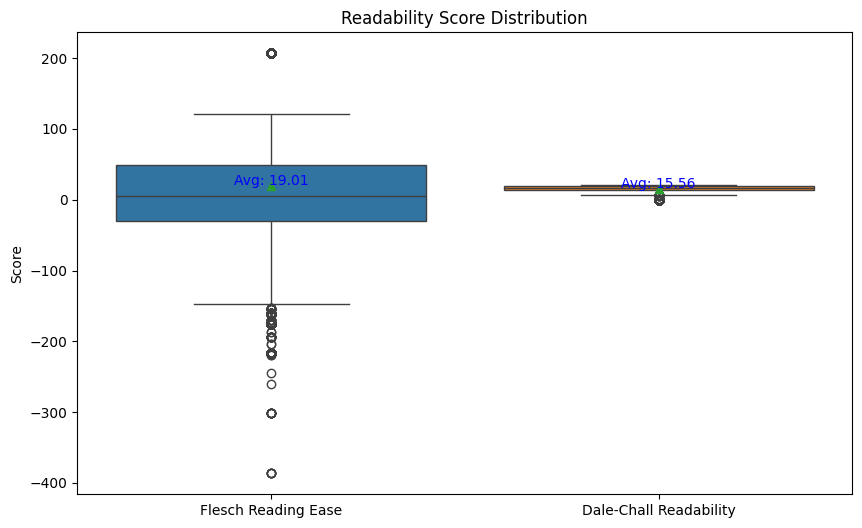

In [16]:
#@title Readability Score sample

import matplotlib.pyplot as plt
import seaborn as sns
import textstat # Import textstat to calculate readability scores

# Assuming 'corpus_no_stopwords' is a list of your text documents
flesch_scores = [textstat.flesch_reading_ease(doc) for doc in corpus_no_stopwords]
dale_chall_scores = [textstat.dale_chall_readability_score(doc) for doc in corpus_no_stopwords]

avg_flesch = sum(flesch_scores) / len(flesch_scores)
avg_dale_chall = sum(dale_chall_scores) / len(dale_chall_scores)

# Create a box plot for both readability scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=[flesch_scores, dale_chall_scores], orient='v', showmeans=True)
plt.title('Readability Score Distribution')
plt.ylabel('Score')
plt.xticks([0, 1], ['Flesch Reading Ease', 'Dale-Chall Readability'])

# Add average scores to the plot
plt.text(0, avg_flesch + 2, f"Avg: {avg_flesch:.2f}", color='blue', ha='center')
plt.text(1, avg_dale_chall + 0.5, f"Avg: {avg_dale_chall:.2f}", color='blue', ha='center')

plt.show()

In [19]:
# @title Lemmatizing words in the cleaned corpus
import spacy

nlp = spacy.load('en_core_web_sm')

def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

lemmatized_corpus = [lemmatize_text(doc) for doc in corpus_no_stopwords]
print("Text lemmatized successfully.")
for words in lemmatized_corpus[:5]:
  print(words)

Text lemmatized successfully.

introduction
creation fifth edition diagnostic statistical manual mental disorder
dsm massive undertaking involve hundred people work toward
common goal 12 year process much think deliberation involve


In [20]:
# @title Segmenting the words witin the corpus to sentences
from nltk.tokenize import sent_tokenize

def segment_sentences(corpus):
    segmented_corpus = []
    for doc in corpus:
        sentences = sent_tokenize(doc)
        segmented_corpus.extend(sentences)
    return segmented_corpus

segmented_corpus = segment_sentences(lemmatized_corpus)
print("Success message")
for words in segmented_corpus[:5]:
  print(words)
cleaned_corpus=segmented_corpus

Success message
introduction
creation fifth edition diagnostic statistical manual mental disorder
dsm massive undertaking involve hundred people work toward
common goal 12 year process much think deliberation involve
evaluate diagnostic criterion consider organization every aspect manual create new feature believe useful clinician effort


In [21]:
# @title Vectorizing the segmented corpus
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd


def vectorize_corpus(cleaned_corpus):
    vectorizer = TfidfVectorizer()
    # vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=0.95, min_df=2)
    vectors = vectorizer.fit_transform(corpus)
    return vectors, vectorizer

vectors, vectorizer = vectorize_corpus(cleaned_corpus)
print("Success!")
print(vectors.shape)  # Print shape of the vectors to check

Success!
(47995, 15043)


In [22]:
# @title Importing libraries
import pickle

# Assuming your vectorizer is stored in a variable named 'vectorizer'
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


In [23]:
# @title Creating SQL database
import sqlite3

def create_database(db_name, table_name, corpus, vectors):
    # Connect to SQLite database (or create it)
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()

    # Create table if it doesn't exist
    cursor.execute(f"""
    CREATE TABLE IF NOT EXISTS {table_name} (
        id INTEGER PRIMARY KEY,
        text TEXT,
        vector BLOB
    )
    """)

    # Insert data into table
    for i, (doc, vector) in enumerate(zip(corpus, vectors)):
        vector_blob = pickle.dumps(vector.toarray())  # Serialize the vector to store in DB
        cursor.execute(f"INSERT INTO {table_name} (text, vector) VALUES (?, ?)", (doc, vector_blob))

    # Commit and close connection
    conn.commit()
    conn.close()

# Make sure to close any open file handles before accessing the database
if 'f' in globals():
    f.close()  # Close the file object if it exists

db_name = 'mental_health_corpus.db'
table_name = 'documents'
create_database(db_name, table_name, cleaned_corpus, vectors)

print("Database created and filled successfully.")


Database created and filled successfully.


In [24]:
# @title Download the database file
# from google.colab import files
# files.download(db_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
# @title Retrieval
import sqlite3
import numpy as np
import pickle
from sklearn.metrics.pairwise import cosine_similarity

def vectorize_query(query, vectorizer):
    query_vector = vectorizer.transform([query])
    return query_vector

def retrieve_documents(query, vectorizer, db_name, table_name, top_n=5):
    query_vector = vectorize_query(query, vectorizer)

    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    cursor.execute(f"SELECT id, text, vector FROM {table_name}")
    rows = cursor.fetchall()

    doc_scores = []
    for row in rows:
        doc_id, text, vector_blob = row
        doc_vector = pickle.loads(vector_blob)
        similarity = cosine_similarity(query_vector, doc_vector)[0][0]
        doc_scores.append((similarity, text))

    # Sort documents by similarity score in descending order
    doc_scores.sort(reverse=True, key=lambda x: x[0])

    # Get top N unique and meaningful documents
    unique_documents = []
    seen_texts = set()
    for score, text in doc_scores:
        if text not in seen_texts and len(text.split()) > 2:  # Ensure the text is meaningful
            unique_documents.append((score, text))
            seen_texts.add(text)
        if len(unique_documents) == top_n:
            break

    conn.close()
    return unique_documents

# Example usage
query = "What do we understand by the term neurodevelopmental?"
top_documents = retrieve_documents(query, vectorizer, db_name, table_name)
print("Retrieved Documents:")
for score, doc in top_documents:
    print(f"Similarity: {score}, Document: {doc}")


Retrieved Documents:
Similarity: 0.35581428487969935, Document: individual undergo least one medical procedure treatment support
Similarity: 0.35581428487969935, Document: loss alteration voluntary motor sensory functioning
Similarity: 0.31971245193888753, Document: understand risk social situation
Similarity: 0.31971245193888753, Document: icd 11 development time publication use term intellectual developmental disorder indicate disorder involve impaired brain functioning
Similarity: 0.31971245193888753, Document: onset vocabulary size small less varied expect sentence


In [27]:
import sqlite3
import numpy as np
import pickle
from sklearn.metrics.pairwise import cosine_similarity

def vectorize_query(query, vectorizer):
    query_vector = vectorizer.transform([query])
    return query_vector

def is_meaningful(text):
    # Define criteria for a meaningful sentence (e.g., minimum length, presence of subject and verb, etc.)
    return len(text.split()) > 5  # Example: more than 5 words

def retrieve_documents(query, vectorizer, db_name, table_name, top_n=5):
    query_vector = vectorize_query(query, vectorizer)

    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    cursor.execute(f"SELECT id, text, vector FROM {table_name}")
    rows = cursor.fetchall()

    doc_scores = []
    for row in rows:
        doc_id, text, vector_blob = row
        doc_vector = pickle.loads(vector_blob)
        similarity = cosine_similarity(query_vector, doc_vector)[0][0]
        if is_meaningful(text):
            doc_scores.append((similarity, text))

    # Sort documents by similarity score in descending order
    doc_scores.sort(reverse=True, key=lambda x: x[0])

    # Get top N unique documents
    unique_documents = []
    seen_texts = set()
    for score, text in doc_scores:
        if text not in seen_texts:
            unique_documents.append((score, text))
            seen_texts.add(text)
        if len(unique_documents) == top_n:
            break

    conn.close()
    return unique_documents

# Example usage
query = "What do we understand by the term neurodevelopmental?"
top_documents = retrieve_documents(query, vectorizer, db_name, table_name)
print("Retrieved Documents:")
for score, doc in top_documents:
    print(f"Similarity: {score}, Document: {doc}")


Retrieved Documents:
Similarity: 0.35581428487969935, Document: individual undergo least one medical procedure treatment support
Similarity: 0.35581428487969935, Document: loss alteration voluntary motor sensory functioning
Similarity: 0.31971245193888753, Document: icd 11 development time publication use term intellectual developmental disorder indicate disorder involve impaired brain functioning
Similarity: 0.31971245193888753, Document: onset vocabulary size small less varied expect sentence
Similarity: 0.31971245193888753, Document: learn produce speech sound clearly accurately learn produce connected speech fluently developmental skill articulation speech sound follow


In [28]:
!pip install openai==0.27.0
!pip install python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 2.8 MB/s eta 0:00:00


In [35]:
# @title Querying using gpt3
import openai
import os
from dotenv import load_dotenv

from google.colab import userdata

# Get the API key from environment variables
api_key = userdata.get('OPENAI_API_KEY')
openai.api_key = api_key

# Check if the API key was loaded
if api_key is None:
    print("Error: OPENAI_API_KEY not found in environment variables. Make sure it's set in your .env file.")
else:
    openai.api_key = api_key

    # Set the API key for OpenAI
    openai.api_key = api_key


    def generate_response_with_gpt3(query, documents):
        # Format the prompt
        prompt = f"Q: {query}\n"
        for i, doc in enumerate(documents, 1):
            prompt += f"Context {i}: {doc}\n"
        prompt += "A:"

        # Call the OpenAI API
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",  # Specify the GPT-3.5 model
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": prompt}
            ],
            max_tokens=200,
            n=1,
            stop=None,
            temperature=0.7
        )

        # Extract and return the response
        answer = response['choices'][0]['message']['content'].strip()
        return answer

    # Example of a query and a response
    query = "What do we understand by the term neurodevelopmental?"

    response = generate_response_with_gpt3(query, top_documents)
    print(f"Question: {query}")
    print(f"Answer: {response}")

Question: What do we understand by the term neurodevelopmental?
Answer: Neurodevelopmental refers to the process of how the brain and nervous system develop and how this development can impact an individual's cognitive, motor, sensory, and communication abilities. It encompasses conditions or disorders that affect this development, such as intellectual developmental disorders or speech articulation difficulties.


In [33]:
# @title Fetchint from the RAG using Openai
# import sqlite3
# import numpy as np
# import pickle
# from sklearn.metrics.pairwise import cosine_similarity

# def vectorize_query(query, vectorizer):
#     query_vector = vectorizer.transform([query])
#     return query_vector

# def is_meaningful(text):
#     # Define criteria for a meaningful sentence (e.g., minimum length, presence of subject and verb, etc.)
#     return len(text.split()) > 5  # Example: more than 5 words

# def retrieve_documents(query, vectorizer, db_name, table_name, top_n=5):
#     query_vector = vectorize_query(query, vectorizer)

#     conn = sqlite3.connect(db_name)
#     cursor = conn.cursor()
#     cursor.execute(f"SELECT id, text, vector FROM {table_name}")
#     rows = cursor.fetchall()

#     doc_scores = []
#     for row in rows:
#         doc_id, text, vector_blob = row
#         doc_vector = pickle.loads(vector_blob)
#         similarity = cosine_similarity(query_vector, doc_vector)[0][0]
#         if is_meaningful(text):
#             doc_scores.append((similarity, text))

#     # Sort documents by similarity score in descending order
#     doc_scores.sort(reverse=True, key=lambda x: x[0])

#     # Get top N unique documents
#     unique_documents = []
#     seen_texts = set()
#     for score, text in doc_scores:
#         if text not in seen_texts:
#             unique_documents.append((score, text))
#             seen_texts.add(text)
#         if len(unique_documents) == top_n:
#             break

#     conn.close()
#     return unique_documents

# # Example usage
# query = "What do we understand by the term neurodevelopmental?"
# top_documents = retrieve_documents(query, vectorizer, db_name, table_name)
# print("Top 5 Retrieved Documents:")
# for score, doc in top_documents:
#     print(f"Similarity: {score}, Document: {doc}")


In [34]:
# @title Chose the best document or Sentence

# Function to choose the best document out of the top 5
# def choose_best_document(top_documents):
#     # For simplicity, choose the document with the highest similarity score
#     best_document = top_documents[0]
#     return best_document

# # Choose the best document
# best_document = choose_best_document(top_documents)
# print("Best Document:")
# print(f"Similarity: {best_document[0]}, Document: {best_document[1]}")
